Analyze the Google drive feedback (exported as tsv in `data/feedback.tsv`) that are embeded at the end of tutorials

In [1]:
!type python

python is /Users/bebatut/miniconda3/envs/galaxy-training-material-stats/bin/python


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from pprint import pprint

# Load the feedback

In [3]:
df = pd.read_csv('../data/feedback.tsv', sep='\t')
# remove last column
df = df.drop(['Make feedback confidential?'], axis=1)
# rename column
df = df.rename(columns = {'Timestamp': 'timestamp',
    'How much did you like this tutorial?': 'note',
    'What did you like?': 'pro',
    'What could be improved?': 'con',
    'Tutorial': 'tutorial_topic'})
# extract topic from tutorial name
new = df.tutorial_topic.str[::-1].str.split('(', n = 1, expand = True)
df["tutorial"]= new[1].str[::-1].str[:-1]
df["topic"]= new[0].str[::-1].str[:-1]
df = df.drop(columns =["tutorial_topic"])
# remove rows with NaN on note, pro and con
df = df.dropna(subset=['note', 'pro', 'con'], how='all')
# replace NaN in note by 0
df = df.fillna(value={'note': 0})
# format note to integer
df.note = df.note.astype(int)
# format pro and con to string
df.pro = df.pro.astype(str)
df.con = df.con.astype(str)
# format timestamp to remove hour
df.timestamp = df.timestamp.str.split(' ', n = 1, expand = True)[0]
# number of rows
len(df)

492

In [4]:
df.head()

,timestamp,note,pro,con,tutorial,topic
0,09/09/2018,4,nan,the clear instruction pattern,A short introduction to Galaxy,Introduction to Galaxy Analyses
1,11/09/2018,5,very detailed,nan,A short introduction to Galaxy,Introduction to Galaxy Analyses
2,14/09/2018,5,"very detailed and easy to follow, even for a c...",nan,Galaxy 101,Introduction to Galaxy Analyses
3,15/09/2018,5,"very detailed and easy to follow, thank you",nan,Introduction to Genomics and Galaxy,Introduction to Galaxy Analyses
4,15/09/2018,5,That all the tools had helpful explanations,If there was a guide to say which tool to use ...,Galaxy 101,Introduction to Galaxy Analyses


# General stats

In [5]:
df.note.value_counts(sort=False)[1:]

1     23
2     13
3     25
4    104
5    323
Name: note, dtype: int64

In [6]:
def plot_note_histogram(df):
    df.note.value_counts(sort=False)[1:].plot(kind='barh', color='DarkOrange')

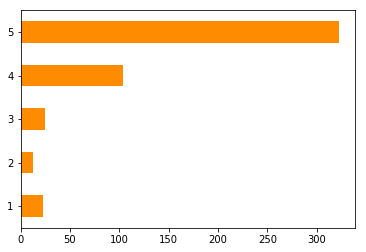

In [7]:
plot_note_histogram(df)

# Aggregated results

In [8]:
grouped_by_topic = df.groupby(by="topic")

In [9]:
list(grouped_by_topic.groups.keys())

['Assembly',
 'ChIP-Seq data analysis',
 'Contributing to the Galaxy Training Material',
 'Data Manipulation',
 'Development in Galaxy',
 'Ecology',
 'Epigenetics',
 'Galaxy Server administration',
 'Genome Annotation',
 'Introduction to Galaxy Analyses',
 'Metabolomics',
 'Metagenomics',
 'Proteomics',
 'Sequence analysis',
 'Statistics and machine learning',
 'Teaching and Hosting Galaxy training',
 'Transcriptomics',
 'User Interface and Features',
 'Variant Analysis']

In [10]:
def get_topic_df(grouped_by_topic, topic):
    '''Extract the dataframe for a topic and plot note histogram
    
    :grouped_by_topic: groupby object grouping by topic
    :topic: topic to extract
    
    :return: dataframe object for the topic
    '''
    topic_df = grouped_by_topic.get_group(topic)
    topic_df = topic_df.drop('topic', 1)
    #topic_df = topic_df.drop('timestamp', 1)
    plot_note_histogram(topic_df)
    return topic_df

In [11]:
def extract_tutorial_feedbacks(topic_df, topic_name):
    '''Extract pro/con per tutorial for a topic and 
    write them in a file
    
    :topic_df: dataframe object for the topic
    :topic_name: name for the topic, name for the file
    '''
    grouped_by_tuto = topic_df.groupby(by="tutorial")
    with open('../results/%s' % topic_name, 'w') as f:
        for tuto, group in grouped_by_tuto:
            # get groups
            tuto_df = grouped_by_tuto.get_group(tuto)
            pros = []
            cons = []
            for index, row in tuto_df.iterrows():
                if row['pro'] != 'nan':
                    pros.append("%s (%s)" % (row['pro'], row['timestamp']))
                if row['con'] != 'nan':
                    cons.append("%s (%s)" % (row['con'], row['timestamp']))
            # write in report file
            f.write("%s\n" % tuto)
            f.write("    Pro:\n        ")
            f.write("\n        ".join(pros))
            f.write("\n    Con:\n        ")
            f.write("\n        ".join(cons))
            f.write("\n\n")

## Introduction to Galaxy Analyses

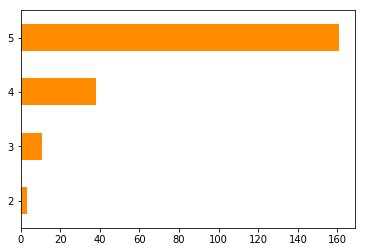

In [12]:
topic_df = get_topic_df(grouped_by_topic, "Introduction to Galaxy Analyses")
extract_tutorial_feedbacks(topic_df, 'introduction')

## Assembly

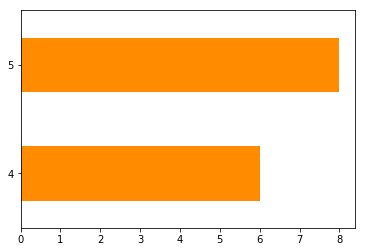

In [13]:
topic_df = get_topic_df(grouped_by_topic, "Assembly")
extract_tutorial_feedbacks(topic_df, 'assembly')

## ChIP-Seq data analysis

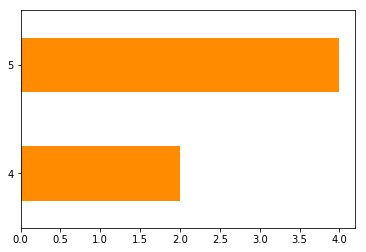

In [14]:
topic_df = get_topic_df(grouped_by_topic, "ChIP-Seq data analysis")
extract_tutorial_feedbacks(topic_df, 'chip-seq')

## Ecology

In [15]:
topic_df = get_topic_df(grouped_by_topic, "Ecology")
extract_tutorial_feedbacks(topic_df, 'ecology')

TypeError: Empty 'DataFrame': no numeric data to plot

## Epigenetics

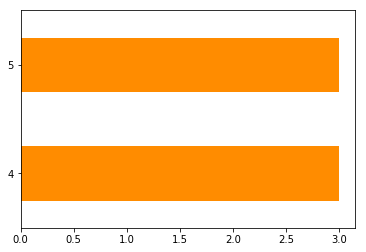

In [16]:
topic_df = get_topic_df(grouped_by_topic, "Epigenetics")
extract_tutorial_feedbacks(topic_df, 'epigenetics')

## Genome Annotation

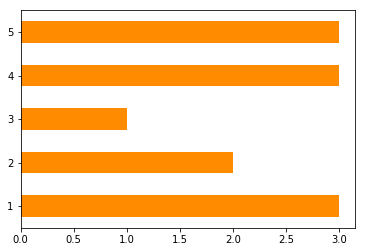

In [17]:
topic_df = get_topic_df(grouped_by_topic, "Genome Annotation")
extract_tutorial_feedbacks(topic_df, 'genome-annotation')

## Metabolomics

In [18]:
topic_df = get_topic_df(grouped_by_topic, "Metabolomics")
extract_tutorial_feedbacks(topic_df, 'metabolomics')

TypeError: Empty 'DataFrame': no numeric data to plot

## Metagenomics

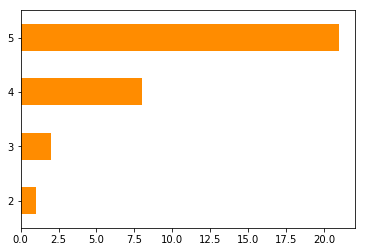

In [19]:
topic_df = get_topic_df(grouped_by_topic, "Metagenomics")
extract_tutorial_feedbacks(topic_df, 'metagenomics')

## Proteomics

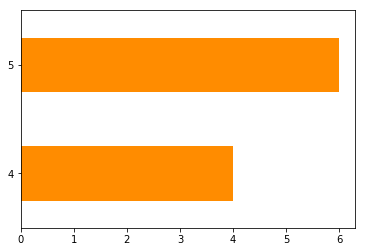

In [20]:
topic_df = get_topic_df(grouped_by_topic, "Proteomics")
extract_tutorial_feedbacks(topic_df, 'proteomics')

## Sequence analysis

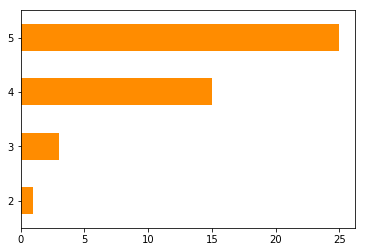

In [21]:
topic_df = get_topic_df(grouped_by_topic, "Sequence analysis")
extract_tutorial_feedbacks(topic_df, 'sequence-analysis')

## Statistics and machine learning

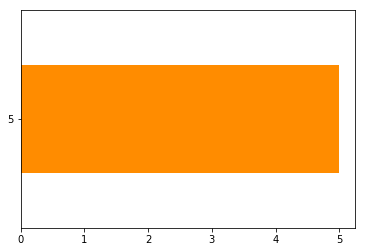

In [22]:
topic_df = get_topic_df(grouped_by_topic, "Statistics and machine learning")
extract_tutorial_feedbacks(topic_df, 'statistics-machine-learning')

## Transcriptomics

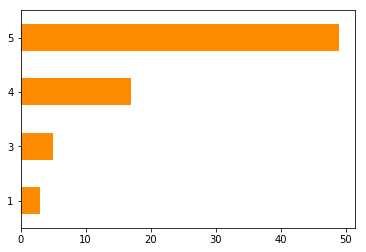

In [23]:
topic_df = get_topic_df(grouped_by_topic, "Transcriptomics")
extract_tutorial_feedbacks(topic_df, 'transcriptomics')

## Variant Analysis

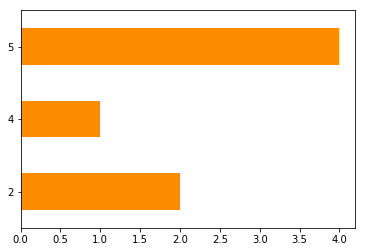

In [24]:
topic_df = get_topic_df(grouped_by_topic, "Variant Analysis")
extract_tutorial_feedbacks(topic_df, 'variant-analysis')

## Data Manipulation

In [25]:
topic_df = get_topic_df(grouped_by_topic, "Data Manipulation")
extract_tutorial_feedbacks(topic_df, 'data-manipulation')

TypeError: Empty 'DataFrame': no numeric data to plot

## User Interface and Features

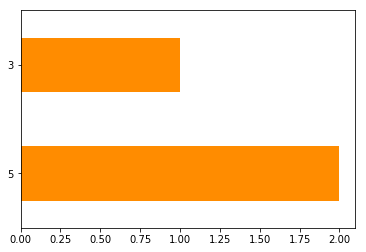

In [26]:
topic_df = get_topic_df(grouped_by_topic, "User Interface and Features")
extract_tutorial_feedbacks(topic_df, 'user-interface-features')

## Galaxy Server administration

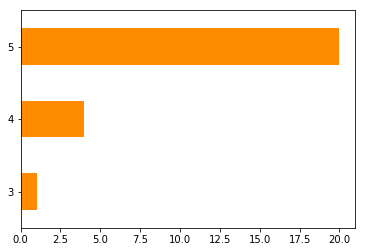

In [27]:
topic_df = get_topic_df(grouped_by_topic, "Galaxy Server administration")
extract_tutorial_feedbacks(topic_df, 'admin')

## Development in Galaxy

In [28]:
topic_df = get_topic_df(grouped_by_topic, "Development in Galaxy")
extract_tutorial_feedbacks(topic_df, 'development')

TypeError: Empty 'DataFrame': no numeric data to plot

## Contributing to the Galaxy Training Material

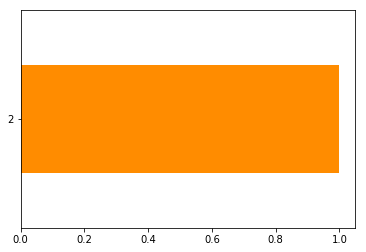

In [29]:
topic_df = get_topic_df(grouped_by_topic, "Contributing to the Galaxy Training Material")
extract_tutorial_feedbacks(topic_df, 'contributing')

## Teaching and Hosting Galaxy training

In [30]:
topic_df = get_topic_df(grouped_by_topic, "Teaching and Hosting Galaxy training")
extract_tutorial_feedbacks(topic_df, 'teaching-hosting-galaxy-training')

TypeError: Empty 'DataFrame': no numeric data to plot